# Sesi 6 - Pandas Ep.2 (EDA with Pandas)

# Data Cleaning with Pandas

Sumber lupa mengisi data yang hilang :
   - Pengguna lupa mengisi kolom 
   - Terjadi kesalahan pemrograman
   - Data hilang saat mentranfer secara manual datari database lama
   - Pengguna memilih untuk tidak mengisi bidang yang terkait dengan keyakinan mereka tentang bagaimana hasil akan digunakan atau ditafsirkan .ipynb_checkpoints/

Cara Clenning, Mulai mempertanyakan :
- Apa saja fiturnya?
- Apa tipe yang diharapkan ( int, float, string, boolean )?
- Apakah ada data yang hilang ( nilai yang dapat dideteksi Panda) ?
- Apakah ada jenis data lain yang hilang tidak begitu jelas ( tidak dapat deteksi dengan pandas)?

Aspec clean data :
- Complete 
- Correct 
- Accurate 
- Relevant 

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [4]:
df.head(8)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN


In [5]:
# untuk melihat ST_NUM 
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

Standard Missing Value 

In [6]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

Non-Standart Missing Value

In [7]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [8]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [9]:
missing_value = ["n/a","nan","--"]

In [10]:
#df = pd.read_csv(f"property_data.csv {na_values = missing_value}")

In [11]:
# gak ngerti yang diatas


In [12]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [13]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

Unexpected Missing Values 

In [14]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [15]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [16]:
cnt = 0 
for aa in df['OWN_OCCUPIED']:
    try:
        int(aa)
        df.loc[cnt,'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+= 1

In [17]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [18]:
df.head(5)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [19]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [20]:
df.isnull().values.any()
# pemerikasaan cepat 

True

Replacing

In [21]:
# Fillna = isi yang kosong dengan 
df['ST_NUM'].fillna(125,inplace=True)

In [22]:
df['ST_NUM']

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [23]:
# replacing dengan imputasi  berbasis lokasi you can do with this code
df.loc[2,'ST_NUM'] = 1222

In [24]:
df['ST_NUM']

0     104.0
1     197.0
2    1222.0
3     201.0
4     203.0
5     207.0
6     125.0
7     213.0
8     215.0
Name: ST_NUM, dtype: float64

Cara Yag sangat umum untuk mengganti missing values menggunakan median 

In [25]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median,inplace=True)

TypeError: could not convert string to float: '--'

In [26]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,1222.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


Analyzing Obesity in England 

In [27]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [28]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [29]:
data_age = data.parse(u'7.2', skiprows = 4 , skipfooter=14)

In [30]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [31]:
data_age.rename(columns={u'Unnamed: 0' : u'Year'},inplace=True)
# ganti Unamed 0 dengan Year

In [32]:
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [33]:
data_age.dropna(inplace=True)
#hapus nan

In [34]:
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<AxesSubplot:>

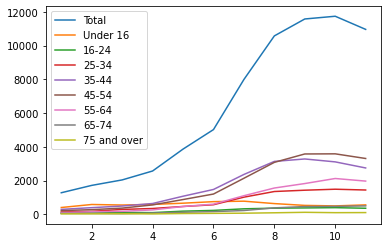

In [35]:
data_age.plot()

In [41]:
data_age_minus_total = data_age.drop("Total",axis=1)
# lupa axis 1 

<AxesSubplot:>

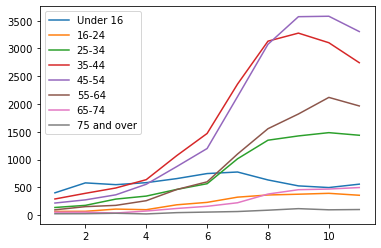

In [40]:
data_age_minus_total.plot()

<AxesSubplot:>

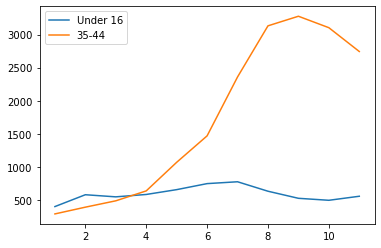

In [44]:
data_age['Under 16'].plot(label="Under 16",legend=True)
data_age['35-44'].plot(label="35-44",legend=True)


Time Series 

Basic Time Series Manipulation 

In [45]:
from datetime import datetime


In [47]:
date_rng = pd.date_range(start='1/01/2020',end='1/08/2020',freq='H')

In [48]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [49]:
df = pd.DataFrame(date_rng,columns=['date'])

In [50]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [51]:
df.head()

,date,data
0,2020-01-01 00:00:00,23
1,2020-01-01 01:00:00,64
2,2020-01-01 02:00:00,20
3,2020-01-01 03:00:00,18
4,2020-01-01 04:00:00,84


In [52]:
df['datetime'] = pd.to_datetime(df['date'])

In [53]:
df = df.set_index('datetime')
# buat indexnya di date time

In [54]:
df.drop(['date'],axis=1,inplace=True)

In [55]:
df.head()

,data
datetime,
2020-01-01 00:00:00,23
2020-01-01 01:00:00,64
2020-01-01 02:00:00,20
2020-01-01 03:00:00,18
2020-01-01 04:00:00,84


In [58]:
jam = 24
uap = 7*22
jam*uap
bioa = 95/7
biob = 2/7
bioa

13.571428571428571

In [63]:
string_date_rng = [str(x) for x in date_rng]
string_date_rng


['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

SyntaxError: invalid syntax (2692980919.py, line 1)

In [65]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format = True)

In [66]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [67]:
string_date_rng_2=['June-01-2020','June-02-2020','June-03-2020']

In [68]:
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]

In [69]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

Jika Kita masukan ini kedalaman data frame 


In [70]:
df2 = pd.DataFrame(timestamp_date_rng_2,columns=['date'])

In [71]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [72]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,66
2020-01-02 01:00:00,22
2020-01-02 02:00:00,31
2020-01-02 03:00:00,33
2020-01-02 04:00:00,45
2020-01-02 05:00:00,89
2020-01-02 06:00:00,47
2020-01-02 07:00:00,81
2020-01-02 08:00:00,46


In [73]:
df['2020-01-03']

C:\Users\KRISMANTO\AppData\Local\Temp\ipykernel_7192\186698106.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,98
2020-01-03 01:00:00,99
2020-01-03 02:00:00,73
2020-01-03 03:00:00,36
2020-01-03 04:00:00,3
2020-01-03 05:00:00,19
2020-01-03 06:00:00,53
2020-01-03 07:00:00,91
2020-01-03 08:00:00,54


In [74]:
df['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,80
2020-01-04 01:00:00,89
2020-01-04 02:00:00,54
2020-01-04 03:00:00,96
2020-01-04 04:00:00,53
...,...
2020-01-06 19:00:00,36
2020-01-06 20:00:00,68
2020-01-06 21:00:00,40


In [77]:
df.resample('D').mean()

,data
datetime,
2020-01-01,49.125000
2020-01-02,49.208333
2020-01-03,55.041667
2020-01-04,43.625000
2020-01-05,49.583333
2020-01-06,44.791667
2020-01-07,39.125000
2020-01-08,32.000000


In [78]:
df['rolling_sum'] = df.rolling(3).sum()

In [79]:
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,23,NaN
2020-01-01 01:00:00,64,NaN
2020-01-01 02:00:00,20,107.0
2020-01-01 03:00:00,18,102.0
2020-01-01 04:00:00,84,122.0


In [89]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [90]:
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,23,NaN,107.0
2020-01-01 01:00:00,64,NaN,107.0
2020-01-01 02:00:00,20,107.0,107.0
2020-01-01 03:00:00,18,102.0,102.0
2020-01-01 04:00:00,84,122.0,122.0


# Time Series On Dataset

In [91]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape 

(4383, 5)

In [92]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [93]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [95]:
opsd_daily=opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [97]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [98]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',index_col=0,parse_dates=True)


In [100]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [101]:
opsd_daily['Year'] =opsd_daily.index.year

In [102]:
opsd_daily['Month'] = opsd_daily.index.month

In [103]:
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [104]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [105]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [106]:
opsd_daily.loc['2006-01-01']

Consumption    1069.184
Wind                NaN
Solar               NaN
Wind+Solar          NaN
Year           2006.000
Month             1.000
Weekday           6.000
Name: 2006-01-01 00:00:00, dtype: float64

In [107]:
opsd_daily.loc['2006-01-01':'2006-01-03']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1


In [108]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


<AxesSubplot:xlabel='Date'>

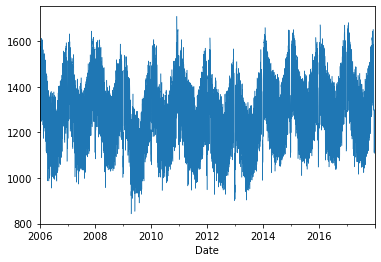

In [114]:
opsd_daily['Consumption'].plot(linewidth=0.5)

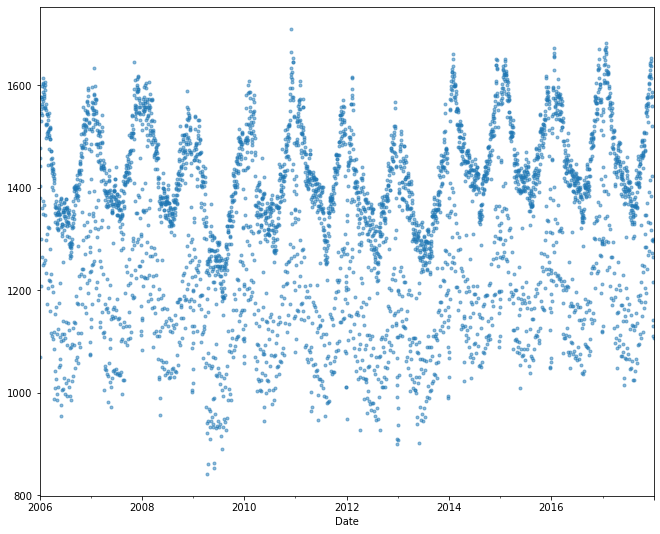

In [120]:
opsd_daily['Consumption'].plot(marker='.',alpha=0.5,linestyle='None',figsize=(11,9));

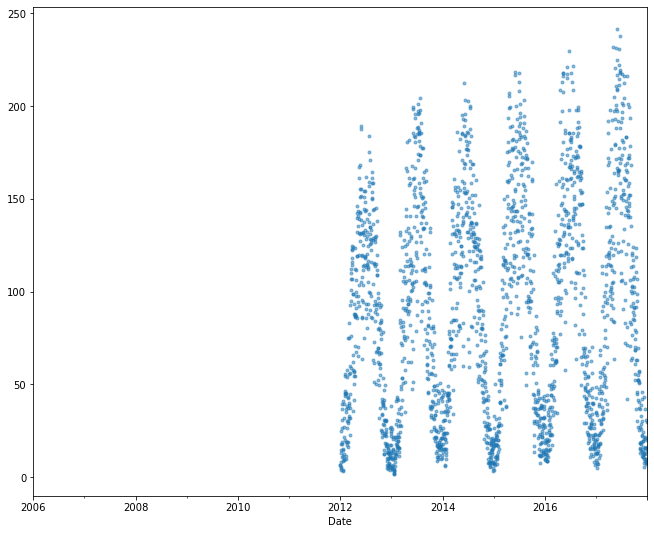

In [121]:
opsd_daily['Solar'].plot(marker='.',alpha=0.5,linestyle='None',figsize=(11,9));

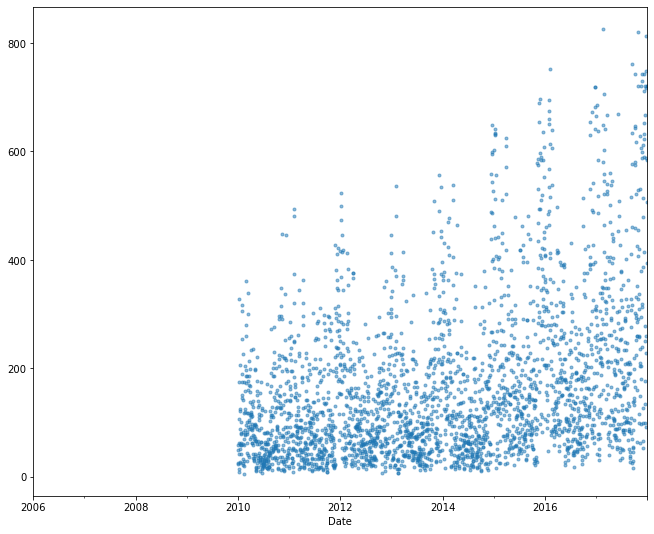

In [122]:
opsd_daily['Wind'].plot(marker='.',alpha=0.5,linestyle='None',figsize=(11,9));

Text(0, 0.5, 'Daily Consumtion (Gwh)')

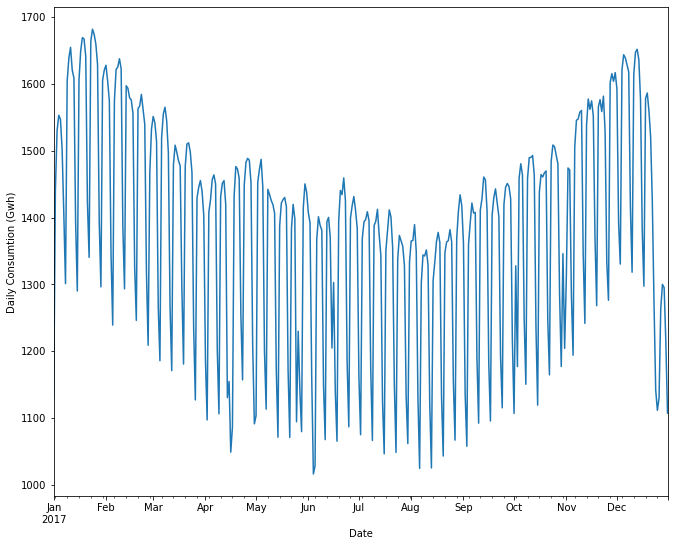

In [125]:
ax = opsd_daily.loc['2017','Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumtion (Gwh)')

Text(0, 0.5, 'Daily Consumtion (Gwh)')

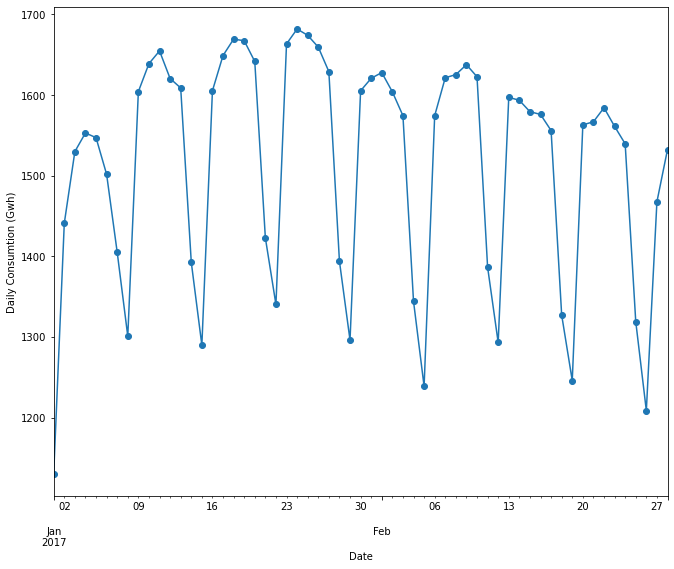

In [126]:
ax =opsd_daily.loc['2017-01':'2017-02','Consumption'].plot(marker='o', linestyle='-', figsize=(11,9))
ax.set_ylabel('Daily Consumtion (Gwh)')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

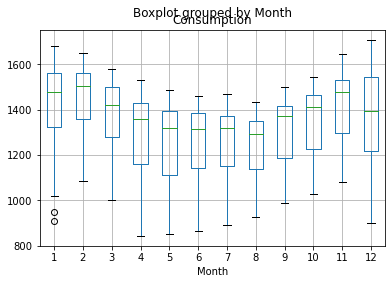

In [127]:
opsd_daily.boxplot(column=['Consumption'],by='Month')


<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

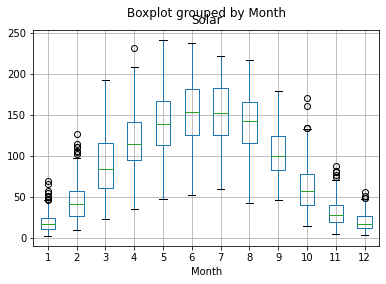

In [128]:
opsd_daily.boxplot(column=['Solar'],by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

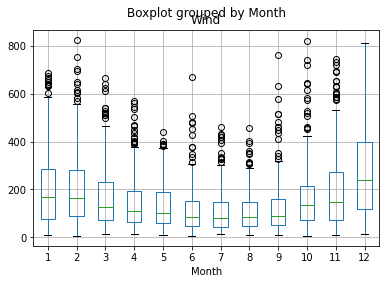

In [129]:
opsd_daily.boxplot(column=['Wind'],by='Month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

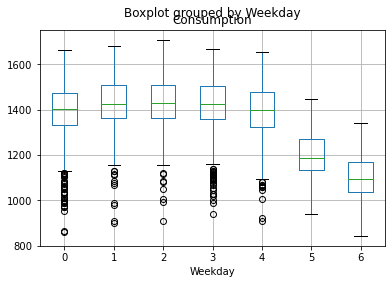

In [130]:
opsd_daily.boxplot(column=['Consumption'],by="Weekday")

In [131]:
data_columns = ['Consumption','Wind','Solar','Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()

In [132]:
opsd_weekly_mean.head(4)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN


In [135]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


In [138]:
start, end = '2017-01','2017-06'

opsd_daily.loc[start:end,'Solar'].plot(marker='.',linestyle='-', linewidth=0.5, figsize(11,9))
opsd_weekly_mean.loc[start:end,'Solar'].plot(marker='o',markersize=8, linestyle='-',figsize=(11,9))

SyntaxError: positional argument follows keyword argument (538359290.py, line 3)